In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr as spear
import seaborn as sb
import statsmodels.api as sm

In [2]:
combined_ide_gpt = pd.DataFrame()


for i in range(1, 11):

    df = pd.read_csv(f'merged/ide_s{i}_gpt_merged.csv')
    
    df['Subset'] = i
    
    combined_ide_gpt = pd.concat([combined_ide_gpt, df], ignore_index=True)

combined_ide_gpt.to_csv('analysis/combined_ide_gpt.csv', index=False)

In [3]:
df1 = pd.read_csv('analysis/combined_ide_gpt.csv')

df2 = pd.read_csv('fr_identity_punc.csv', header=None)

df2.columns = ['Concept', 'mean_E', 'mean_P', 'mean_A', 'sd_E', 'sd_P', 'sd_A']

df1['Concept'] = df1['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')
df2['Concept'] = df2['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')

merged_df = pd.merge(df1, df2, on='Concept', how='inner')

merged_df.to_csv('analysis/ori_combined_ide_gpt.csv', index=False)

In [4]:
df_i = pd.read_csv('analysis/ori_combined_ide_gpt.csv')  

concepts = df_i['Concept'].tolist()
llm_emeans = df_i['Mean_GPT_E'].tolist()
llm_pmeans = df_i['Mean_GPT_P'].tolist()
llm_ameans = df_i['Mean_GPT_A'].tolist()
gt_emeans = df_i['mean_E'].tolist() 
gt_pmeans = df_i['mean_P'].tolist()  
gt_ameans = df_i['mean_A'].tolist()  

============= Spearman Matrix ================
Spearman correlation between GT_E and GT_E: SignificanceResult(statistic=1.0, pvalue=0.0)
Spearman correlation between GT_E and GT_P: SignificanceResult(statistic=0.5775439217284207, pvalue=8.308267099184576e-36)
Spearman correlation between GT_E and GT_A: SignificanceResult(statistic=0.34894760137624103, pvalue=1.5978648723144428e-12)
Spearman correlation between GPT_E and GT_E: SignificanceResult(statistic=0.9170779870061224, pvalue=7.914268671520885e-156)
Spearman correlation between GPT_P and GT_E: SignificanceResult(statistic=0.6909854792754275, pvalue=3.2070191137537904e-56)
Spearman correlation between GPT_A and GT_E: SignificanceResult(statistic=0.13398926690658558, pvalue=0.008308634731110836)

Spearman correlation between GT_P and GT_E: SignificanceResult(statistic=0.5775439217284207, pvalue=8.308267099184576e-36)
Spearman correlation between GT_P and GT_P: SignificanceResult(statistic=1.0, pvalue=0.0)
Spearman correlation betwee

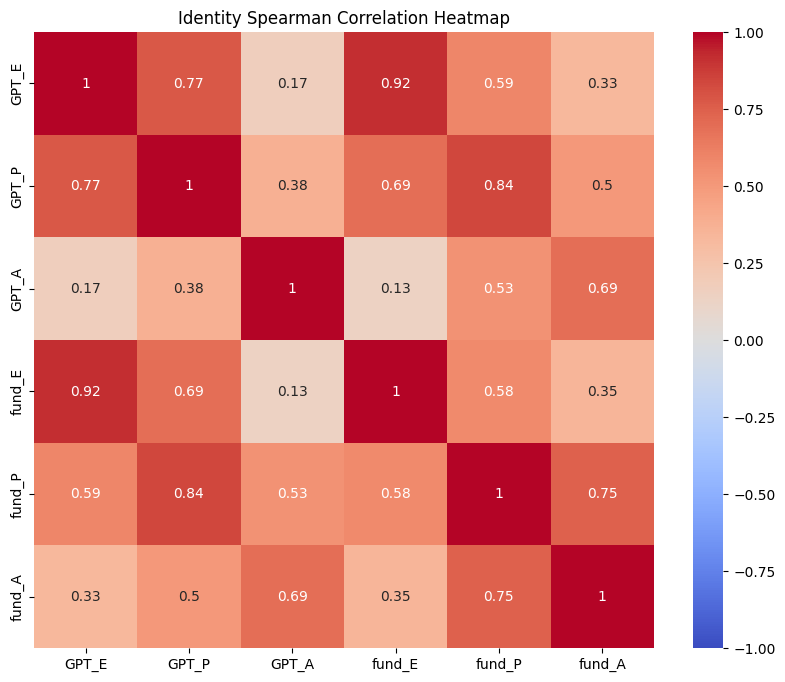

In [5]:
print("============= Spearman Matrix ================")
print("Spearman correlation between GT_E and GT_E:", spear(gt_emeans, gt_emeans))
print("Spearman correlation between GT_E and GT_P:", spear(gt_emeans, gt_pmeans))
print("Spearman correlation between GT_E and GT_A:", spear(gt_emeans, gt_ameans))
print("Spearman correlation between GPT_E and GT_E:", spear(llm_emeans, gt_emeans))
print("Spearman correlation between GPT_P and GT_E:", spear(llm_pmeans, gt_emeans))
print("Spearman correlation between GPT_A and GT_E:", spear(llm_ameans, gt_emeans))
print()
print("Spearman correlation between GT_P and GT_E:", spear(gt_pmeans, gt_emeans))
print("Spearman correlation between GT_P and GT_P:", spear(gt_pmeans, gt_pmeans))
print("Spearman correlation between GT_P and GT_A:", spear(gt_pmeans, gt_ameans))
print("Spearman correlation between GPT_E and GT_P:", spear(llm_emeans, gt_pmeans))
print("Spearman correlation between GPT_P and GT_P:", spear(llm_pmeans, gt_pmeans))
print("Spearman correlation between GPT_A and GT_P:", spear(llm_ameans, gt_pmeans))
print()
print("Spearman correlation between GT_A and GT_E:", spear(gt_ameans, gt_emeans))
print("Spearman correlation between GT_A and GT_P:", spear(gt_ameans, gt_pmeans))
print("Spearman correlation between GT_A and GT_A:", spear(gt_ameans, gt_ameans))
print("Spearman correlation between GPT_E and GT_A:", spear(llm_emeans, gt_ameans))
print("Spearman correlation between GPT_P and GT_A:", spear(llm_pmeans, gt_ameans))
print("Spearman correlation between GPT_A and GT_A:", spear(llm_ameans, gt_ameans))
print()
print("Spearman correlation between GPT_E and GT_E:", spear(llm_emeans, gt_emeans))
print("Spearman correlation between GPT_E and GT_P:", spear(llm_emeans, gt_pmeans))
print("Spearman correlation between GPT_E and GT_A:", spear(llm_emeans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_E:", spear(llm_emeans, llm_emeans))
print("Spearman correlation between GPT_P and GPT_E:", spear(llm_pmeans, llm_emeans))
print("Spearman correlation between GPT_A and GPT_E:", spear(llm_ameans, llm_emeans))
print()
print("Spearman correlation between GPT_P and GT_E:", spear(llm_pmeans, gt_emeans))
print("Spearman correlation between GPT_P and GT_P:", spear(llm_pmeans, gt_pmeans))
print("Spearman correlation between GPT_P and GT_A:", spear(llm_pmeans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_P:", spear(llm_emeans, llm_pmeans))
print("Spearman correlation between GPT_P and GPT_P:", spear(llm_pmeans, llm_pmeans))
print("Spearman correlation between GPT_A and GPT_P:", spear(llm_ameans, llm_pmeans))
print()
print("Spearman correlation between GPT_A and GT_E:", spear(llm_ameans, gt_emeans))
print("Spearman correlation between GPT_A and GT_P:", spear(llm_ameans, gt_pmeans))
print("Spearman correlation between GPT_A and GT_A:", spear(llm_ameans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_A:", spear(llm_emeans, llm_ameans))
print("Spearman correlation between GPT_P and GPT_A:", spear(llm_pmeans, llm_ameans))
print("Spearman correlation between GPT_A and GPT_A:", spear(llm_ameans, llm_ameans))


data = {
    'GPT_E': llm_emeans,
    'GPT_P': llm_pmeans,
    'GPT_A': llm_ameans,
    'fund_E': gt_emeans,  
    'fund_P': gt_pmeans,  
    'fund_A': gt_ameans  
}

df_corr = pd.DataFrame(data)
corr_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Identity Spearman Correlation Heatmap')
plt.show()

In [ ]:
'''
def calculate_spearman_matrix(data_dict):
    result = {}
    for key1, values1 in data_dict.items():
        for key2, values2 in data_dict.items():
            if key1 not in result:
                result[key1] = {}
            result[key1][key2] = spear(values1, values2)[0]
    return pd.DataFrame(result)

spearman_matrix = calculate_spearman_matrix(data)
print("============= Spearman Matrix ================")
print(spearman_matrix)
'''

In [6]:
df_i['diff_E'] = df_i.apply(lambda x: abs(x['mean_E'] - x['Mean_GPT_E']), axis=1)
df_i['diff_P'] = df_i.apply(lambda x: abs(x['mean_P'] - x['Mean_GPT_P']), axis=1)
df_i['diff_A'] = df_i.apply(lambda x: abs(x['mean_A'] - x['Mean_GPT_A']), axis=1)
df_i['real_E'] = df_i.apply(lambda x: x['mean_E'] - x['Mean_GPT_E'], axis=1)
df_i['real_P'] = df_i.apply(lambda x: x['mean_P'] - x['Mean_GPT_P'], axis=1)
df_i['real_A'] = df_i.apply(lambda x: x['mean_A'] - x['Mean_GPT_A'], axis=1)

dfe = df_i.sort_values(by=['diff_E'], ascending=False).reset_index(drop=True).loc[:9]
dfp = df_i.sort_values(by=['diff_P'], ascending=False).reset_index(drop=True).loc[:9]
dfa = df_i.sort_values(by=['diff_A'], ascending=False).reset_index(drop=True).loc[:9]

print("================= Top 10 diffs ================")
print("EVALUATION")
print(dfe[['Concept', 'Mean_GPT_E', 'mean_E', 'diff_E', 'real_E']])
print("POTENCY")
print(dfp[['Concept', 'Mean_GPT_P', 'mean_P', 'diff_P', 'real_P']])
print("ACTIVITY")
print(dfa[['Concept', 'Mean_GPT_A', 'mean_A', 'diff_A', 'real_A']])

with pd.ExcelWriter('results/top_diffs_ide.xlsx') as writer:
    dfe[['Concept', 'Mean_GPT_E', 'mean_E','diff_E', 'real_E']].to_excel(writer, sheet_name='EVALUATION', index=False)
    dfp[['Concept', 'Mean_GPT_P', 'mean_P','diff_P', 'real_P']].to_excel(writer, sheet_name='POTENCY', index=False)
    dfa[['Concept', 'Mean_GPT_A', 'mean_A', 'diff_A','real_A']].to_excel(writer, sheet_name='ACTIVITY', index=False)

================= Top 10 diffs ================
EVALUATION
                   Concept  Mean_GPT_E  mean_E  diff_E  real_E
0             une_dentiste         2.4  -0.029   2.429  -2.429
1           un_homme_queer         2.3   0.072   2.228  -2.228
2            une_clocharde        -3.0  -0.930   2.070   2.070
3            un_socialiste         1.6  -0.400   2.000  -2.000
4             un_serviteur        -1.2   0.771   1.971   1.971
5                une_ratée        -3.6  -1.690   1.910   1.910
6              une_loseuse        -3.1  -1.243   1.857   1.857
7  une_travailleuse_social         3.0   1.171   1.829  -1.829
8              une_barmaid         0.2   1.957   1.757   1.757
9         une_millionnaire         1.8   0.130   1.670  -1.670
POTENCY
                Concept  Mean_GPT_P  mean_P  diff_P  real_P
0         un_kidnappeur        -4.0   0.870   4.870   4.870
1       une_kidnappeuse        -3.8   0.471   4.271   4.271
2            un_violeur        -4.0   0.203   4.203   4.203


In [49]:
df_i.head()

,Number,Concept,Mean_GPT_E,Mean_GPT_P,Mean_GPT_A,Sd_GPT_E,Sd_GPT_P,Sd_GPT_A,Sentence,Subset,mean_E,mean_P,mean_A,sd_E,sd_P,sd_A
0,0,une_mendiante,-1.6,-2.6,-1.4,1.019804,0.489898,1.200000,une mendiante - Comment c'est 'une mendiante'?,1,-1.386,-1.586,-1.271,1.788,1.806,1.864
1,1,un_psychologue,2.6,1.8,-2.2,0.489898,0.400000,0.400000,un psychologue - Comment c'est 'un psychologue'?,1,1.214,0.614,-0.671,1.623,1.772,1.734
2,2,un_fan_de_sport,0.6,0.0,2.8,0.800000,0.000000,0.400000,un fan de sport - Comment c'est 'un fan de spo...,1,0.671,1.014,2.257,1.998,1.583,1.759
3,3,une_travailleuse_occasionnelle,0.2,-1.0,-0.2,0.979796,0.000000,0.400000,une travailleuse occasionnelle - Comment c'es...,1,0.414,0.014,0.400,1.646,1.508,1.478
4,4,une_entrepreneuse,2.4,2.4,1.0,0.489898,0.489898,0.632456,une entrepreneuse - Comment c'est 'une entrepr...,1,2.186,2.071,1.971,1.427,1.448,1.251


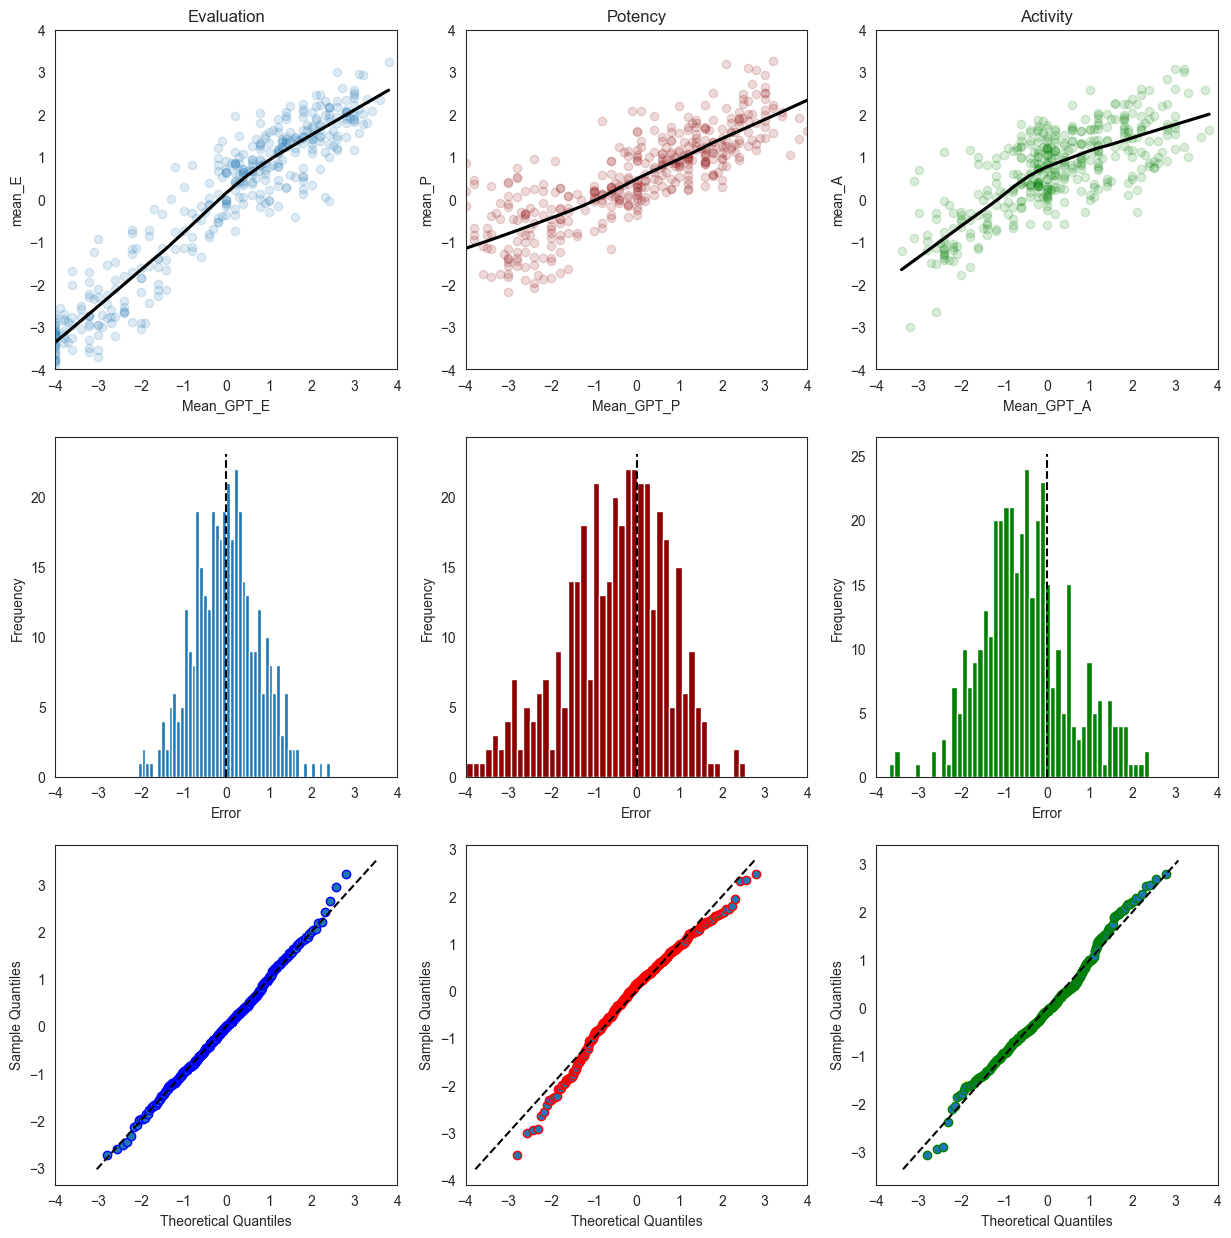

In [7]:
sb.set_style("white")

fig, axes = plt.subplots(3, 3, sharex=False, figsize=(15,15))

for i in range(3):
        axes[0][i].set_xlabel(f'Mean GPT-4 Rating')
        axes[0][i].set_ylabel(f"Mean FR Identity Dictionary Rating")
        axes[0][i].set_xlim([-4,4])
        axes[0][i].set_ylim([-4,4])

sb.regplot(data=df_i, x='Mean_GPT_E', y='mean_E', lowess=True,ax=axes[0][0],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15})
axes[0][0].set_title("Evaluation")

sb.regplot(data=df_i, x='Mean_GPT_P', y='mean_P', lowess=True,ax=axes[0][1],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15,"color":"darkred"})
axes[0][1].set_title("Potency")

sb.regplot(data=df_i,x='Mean_GPT_A', y='mean_A', lowess=True,ax=axes[0][2],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15, "color": "green"})
axes[0][2].set_title("Activity")


axes[1][0].hist(df_i['Mean_GPT_E'] - df_i['mean_E'], bins=50)
axes[1][1].hist(df_i['Mean_GPT_P'] - df_i['mean_P'], bins=50, color="darkred")
axes[1][2].hist(df_i['Mean_GPT_A'] - df_i['mean_A'], bins=50, color="green")
for i in range(3):
        axes[1][i].set_xlabel('Error')
        axes[1][i].set_ylabel("Frequency")
        axes[1][i].set_xlim([-4,4])
        line = np.array(axes[1][i].get_ylim())
        axes[1][i].plot(np.zeros(len(line)), line, linestyle="--", color="black")


sm.qqplot(df_i['Mean_GPT_E'] - df_i['mean_E'], fit=True, ax=axes[2][0], markeredgecolor='b')
sm.qqplot(df_i['Mean_GPT_P'] - df_i['mean_P'], fit=True, ax=axes[2][1], markeredgecolor='r')
sm.qqplot(df_i['Mean_GPT_A'] - df_i['mean_A'], fit=True, ax=axes[2][2], markeredgecolor='g')

for i in range(3):
        axes[2][i].set_xlabel('Theoretical Quantiles')
        axes[2][i].set_ylabel("Sample Quantiles")
        axes[2][i].set_xlim([-4,4])
        line = np.array(axes[2][i].get_ylim())
        axes[2][i].plot(line, line, linestyle="--", color="black")


In [9]:
combined_beh_gpt = pd.DataFrame()


for i in range(1, 10):

    df = pd.read_csv(f'merged/beh_s{i}_gpt_merged.csv')
    
    df['Subset'] = i
    
    combined_beh_gpt = pd.concat([combined_beh_gpt, df], ignore_index=True)

combined_beh_gpt.to_csv('analysis/combined_beh_gpt.csv', index=False)

In [10]:
df1 = pd.read_csv('analysis/combined_beh_gpt.csv')

df2 = pd.read_csv('fr_behavior_punc.csv', header=None)

df2.columns = ['Concept', 'mean_E', 'mean_P', 'mean_A', 'sd_E', 'sd_P', 'sd_A']

df1['Concept'] = df1['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')
df2['Concept'] = df2['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')

merged_df = pd.merge(df1, df2, on='Concept', how='inner')

merged_df.to_csv('analysis/ori_combined_beh_gpt.csv', index=False)

============= Spearman Matrix ================
Spearman correlation between GT_E and GT_E: SignificanceResult(statistic=1.0, pvalue=0.0)
Spearman correlation between GT_E and GT_P: SignificanceResult(statistic=0.8666016711937944, pvalue=2.9671049248443425e-102)
Spearman correlation between GT_E and GT_A: SignificanceResult(statistic=0.166798411885323, pvalue=0.002225394519119345)
Spearman correlation between GPT_E and GT_E: SignificanceResult(statistic=0.9479703610227601, pvalue=4.28950109259415e-167)
Spearman correlation between GPT_P and GT_E: SignificanceResult(statistic=0.7673171514803688, pvalue=4.923308088802282e-66)
Spearman correlation between GPT_A and GT_E: SignificanceResult(statistic=0.06444545056903621, pvalue=0.24015899787991837)

Spearman correlation between GT_P and GT_E: SignificanceResult(statistic=0.8666016711937944, pvalue=2.9671049248443425e-102)
Spearman correlation between GT_P and GT_P: SignificanceResult(statistic=1.0, pvalue=0.0)
Spearman correlation between G

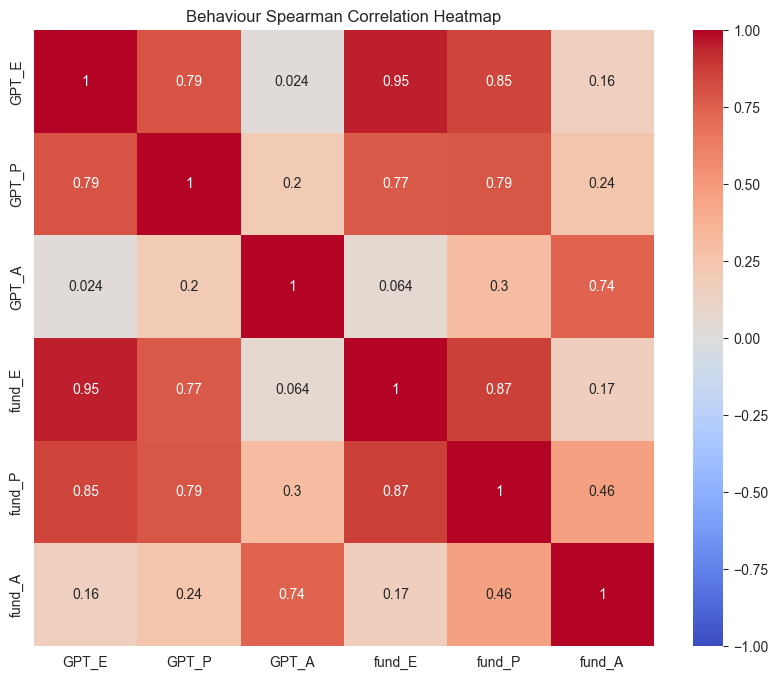

In [11]:
df_b = pd.read_csv('analysis/ori_combined_beh_gpt.csv')  

concepts = df_b['Concept'].tolist()
llm_emeans = df_b['Mean_GPT_E'].tolist()
llm_pmeans = df_b['Mean_GPT_P'].tolist()
llm_ameans = df_b['Mean_GPT_A'].tolist()
gt_emeans = df_b['mean_E'].tolist() 
gt_pmeans = df_b['mean_P'].tolist()  
gt_ameans = df_b['mean_A'].tolist() 

print("============= Spearman Matrix ================")
print("Spearman correlation between GT_E and GT_E:", spear(gt_emeans, gt_emeans))
print("Spearman correlation between GT_E and GT_P:", spear(gt_emeans, gt_pmeans))
print("Spearman correlation between GT_E and GT_A:", spear(gt_emeans, gt_ameans))
print("Spearman correlation between GPT_E and GT_E:", spear(llm_emeans, gt_emeans))
print("Spearman correlation between GPT_P and GT_E:", spear(llm_pmeans, gt_emeans))
print("Spearman correlation between GPT_A and GT_E:", spear(llm_ameans, gt_emeans))
print()
print("Spearman correlation between GT_P and GT_E:", spear(gt_pmeans, gt_emeans))
print("Spearman correlation between GT_P and GT_P:", spear(gt_pmeans, gt_pmeans))
print("Spearman correlation between GT_P and GT_A:", spear(gt_pmeans, gt_ameans))
print("Spearman correlation between GPT_E and GT_P:", spear(llm_emeans, gt_pmeans))
print("Spearman correlation between GPT_P and GT_P:", spear(llm_pmeans, gt_pmeans))
print("Spearman correlation between GPT_A and GT_P:", spear(llm_ameans, gt_pmeans))
print()
print("Spearman correlation between GT_A and GT_E:", spear(gt_ameans, gt_emeans))
print("Spearman correlation between GT_A and GT_P:", spear(gt_ameans, gt_pmeans))
print("Spearman correlation between GT_A and GT_A:", spear(gt_ameans, gt_ameans))
print("Spearman correlation between GPT_E and GT_A:", spear(llm_emeans, gt_ameans))
print("Spearman correlation between GPT_P and GT_A:", spear(llm_pmeans, gt_ameans))
print("Spearman correlation between GPT_A and GT_A:", spear(llm_ameans, gt_ameans))
print()
print("Spearman correlation between GPT_E and GT_E:", spear(llm_emeans, gt_emeans))
print("Spearman correlation between GPT_E and GT_P:", spear(llm_emeans, gt_pmeans))
print("Spearman correlation between GPT_E and GT_A:", spear(llm_emeans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_E:", spear(llm_emeans, llm_emeans))
print("Spearman correlation between GPT_P and GPT_E:", spear(llm_pmeans, llm_emeans))
print("Spearman correlation between GPT_A and GPT_E:", spear(llm_ameans, llm_emeans))
print()
print("Spearman correlation between GPT_P and GT_E:", spear(llm_pmeans, gt_emeans))
print("Spearman correlation between GPT_P and GT_P:", spear(llm_pmeans, gt_pmeans))
print("Spearman correlation between GPT_P and GT_A:", spear(llm_pmeans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_P:", spear(llm_emeans, llm_pmeans))
print("Spearman correlation between GPT_P and GPT_P:", spear(llm_pmeans, llm_pmeans))
print("Spearman correlation between GPT_A and GPT_P:", spear(llm_ameans, llm_pmeans))
print()
print("Spearman correlation between GPT_A and GT_E:", spear(llm_ameans, gt_emeans))
print("Spearman correlation between GPT_A and GT_P:", spear(llm_ameans, gt_pmeans))
print("Spearman correlation between GPT_A and GT_A:", spear(llm_ameans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_A:", spear(llm_emeans, llm_ameans))
print("Spearman correlation between GPT_P and GPT_A:", spear(llm_pmeans, llm_ameans))
print("Spearman correlation between GPT_A and GPT_A:", spear(llm_ameans, llm_ameans))


data = {
    'GPT_E': llm_emeans,
    'GPT_P': llm_pmeans,
    'GPT_A': llm_ameans,
    'fund_E': gt_emeans,  
    'fund_P': gt_pmeans,  
    'fund_A': gt_ameans  
}

df_corr = pd.DataFrame(data)
corr_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Behaviour Spearman Correlation Heatmap')
plt.show()

In [12]:
df_b['diff_E'] = df_b.apply(lambda x: abs(x['mean_E'] - x['Mean_GPT_E']), axis=1)
df_b['diff_P'] = df_b.apply(lambda x: abs(x['mean_P'] - x['Mean_GPT_P']), axis=1)
df_b['diff_A'] = df_b.apply(lambda x: abs(x['mean_A'] - x['Mean_GPT_A']), axis=1)
df_b['real_E'] = df_b.apply(lambda x: x['mean_E'] - x['Mean_GPT_E'], axis=1)
df_b['real_P'] = df_b.apply(lambda x: x['mean_P'] - x['Mean_GPT_P'], axis=1)
df_b['real_A'] = df_b.apply(lambda x: x['mean_A'] - x['Mean_GPT_A'], axis=1)

dfe = df_b.sort_values(by=['diff_E'], ascending=False).reset_index(drop=True).loc[:9]
dfp = df_b.sort_values(by=['diff_P'], ascending=False).reset_index(drop=True).loc[:9]
dfa = df_b.sort_values(by=['diff_A'], ascending=False).reset_index(drop=True).loc[:9]

print("================= Top 10 diffs ================")
print("EVALUATION")
print(dfe[['Concept', 'Mean_GPT_E', 'mean_E', 'diff_E', 'real_E']])
print("POTENCY")
print(dfp[['Concept', 'Mean_GPT_P', 'mean_P', 'diff_P', 'real_P']])
print("ACTIVITY")
print(dfa[['Concept', 'Mean_GPT_A', 'mean_A', 'diff_A', 'real_A']])

with pd.ExcelWriter('results/top_diffs_beh.xlsx') as writer:
    dfe[['Concept', 'Mean_GPT_E', 'mean_E','diff_E', 'real_E']].to_excel(writer, sheet_name='EVALUATION', index=False)
    dfp[['Concept', 'Mean_GPT_P', 'mean_P','diff_P', 'real_P']].to_excel(writer, sheet_name='POTENCY', index=False)
    dfa[['Concept', 'Mean_GPT_A', 'mean_A', 'diff_A','real_A']].to_excel(writer, sheet_name='ACTIVITY', index=False)

================= Top 10 diffs ================
EVALUATION
                                Concept  Mean_GPT_E  mean_E  diff_E  real_E
0          prendre_sa_revanche_sur_qqn.        -2.4   1.200   3.600   3.600
1                      appeler_à_l_aide         2.0  -1.100   3.100  -3.100
2                 mater_(reluquer)_qqn.        -3.4  -0.729   2.671   2.671
3                    rire_de_qqn./qqch.        -2.0   0.243   2.243   2.243
4                         reluquer_qqn.        -2.8  -0.714   2.086   2.086
5                        idolâtrer_qqn.        -1.6   0.457   2.057   2.057
6      traiter_qqn._avec_condescendance        -3.9  -1.857   2.043   2.043
7  sourire_de_manière_suffisante_à_qqn.        -2.0   0.000   2.000   2.000
8             désirer_sexuellement_qqn.         0.6   2.557   1.957   1.957
9                            manifester         1.8  -0.129   1.929  -1.929
POTENCY
                        Concept  Mean_GPT_P  mean_P  diff_P  real_P
0                 molester_qq

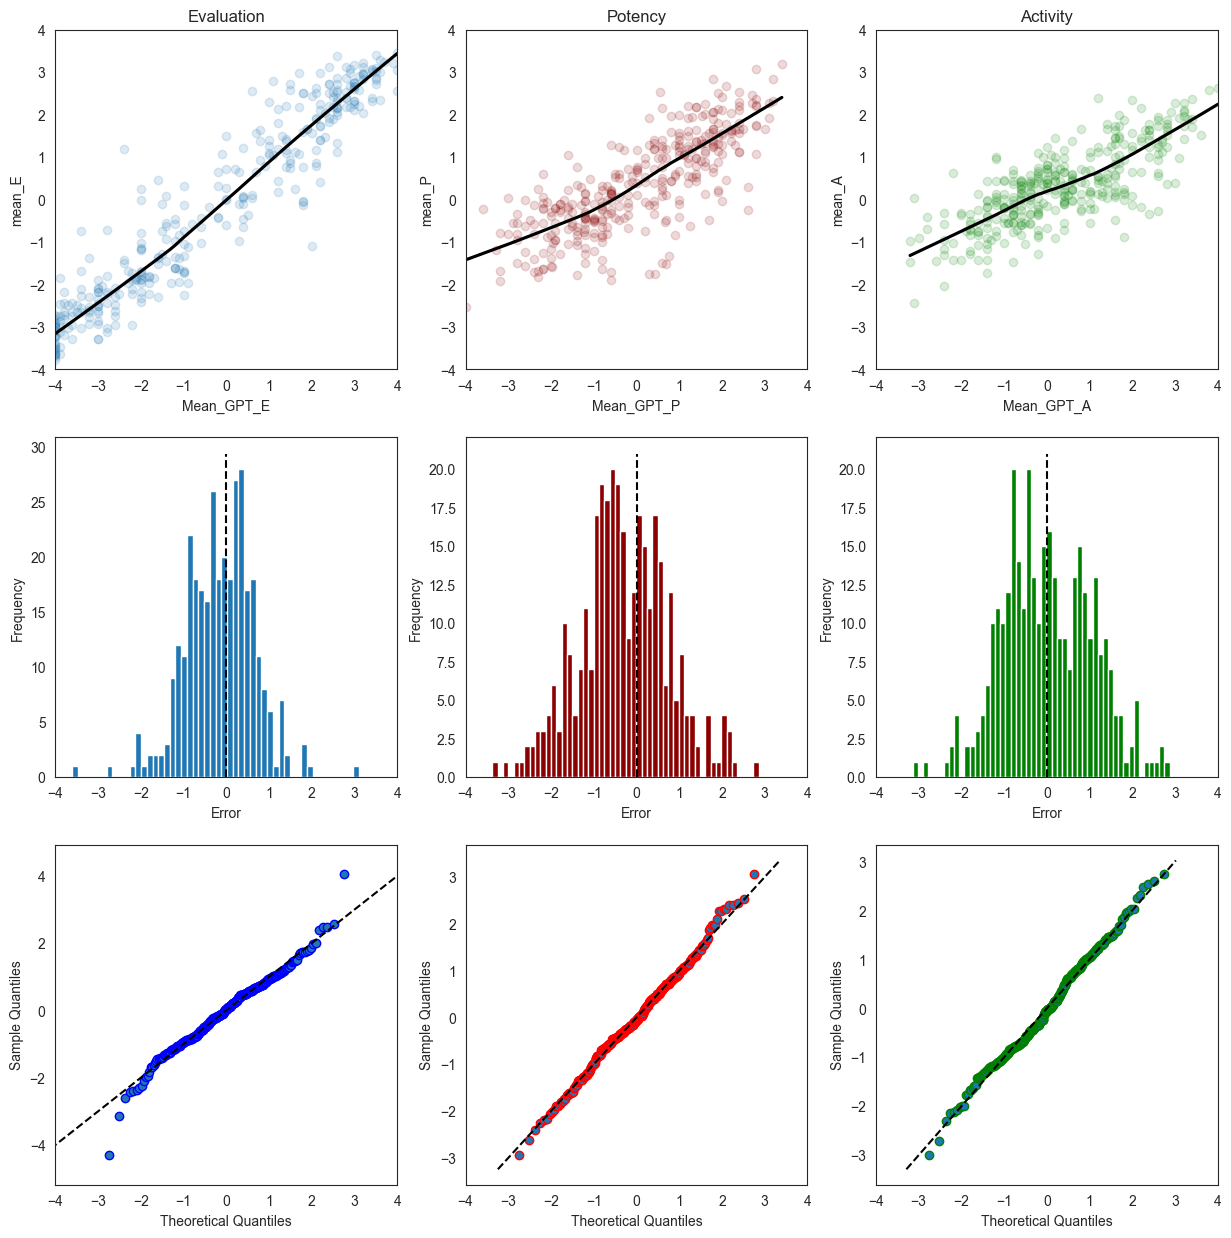

In [13]:
sb.set_style("white")

fig, axes = plt.subplots(3, 3, sharex=False, figsize=(15,15))

for i in range(3):
        axes[0][i].set_xlabel(f'Mean GPT-4 Rating')
        axes[0][i].set_ylabel(f"Mean FR Behaviour Dictionary Rating")
        axes[0][i].set_xlim([-4,4])
        axes[0][i].set_ylim([-4,4])

sb.regplot(data=df_b, x='Mean_GPT_E', y='mean_E', lowess=True,ax=axes[0][0],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15})
axes[0][0].set_title("Evaluation")

sb.regplot(data=df_b, x='Mean_GPT_P', y='mean_P', lowess=True,ax=axes[0][1],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15,"color":"darkred"})
axes[0][1].set_title("Potency")

sb.regplot(data=df_b,x='Mean_GPT_A', y='mean_A', lowess=True,ax=axes[0][2],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15, "color": "green"})
axes[0][2].set_title("Activity")


axes[1][0].hist(df_b['Mean_GPT_E'] - df_b['mean_E'], bins=50)
axes[1][1].hist(df_b['Mean_GPT_P'] - df_b['mean_P'], bins=50, color="darkred")
axes[1][2].hist(df_b['Mean_GPT_A'] - df_b['mean_A'], bins=50, color="green")
for i in range(3):
        axes[1][i].set_xlabel('Error')
        axes[1][i].set_ylabel("Frequency")
        axes[1][i].set_xlim([-4,4])
        line = np.array(axes[1][i].get_ylim())
        axes[1][i].plot(np.zeros(len(line)), line, linestyle="--", color="black")


sm.qqplot(df_b['Mean_GPT_E'] - df_b['mean_E'], fit=True, ax=axes[2][0], markeredgecolor='b')
sm.qqplot(df_b['Mean_GPT_P'] - df_b['mean_P'], fit=True, ax=axes[2][1], markeredgecolor='r')
sm.qqplot(df_b['Mean_GPT_A'] - df_b['mean_A'], fit=True, ax=axes[2][2], markeredgecolor='g')

for i in range(3):
        axes[2][i].set_xlabel('Theoretical Quantiles')
        axes[2][i].set_ylabel("Sample Quantiles")
        axes[2][i].set_xlim([-4,4])
        line = np.array(axes[2][i].get_ylim())
        axes[2][i].plot(line, line, linestyle="--", color="black")


In [14]:
df1 = pd.read_csv('analysis/combined_beh_gpt.csv')

df2 = pd.read_csv('fr_behavior_punc.csv', header=None)

df2.columns = ['Concept', 'mean_E', 'mean_P', 'mean_A', 'sd_E', 'sd_P', 'sd_A']

df1['Concept'] = df1['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')
df2['Concept'] = df2['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')
df2.to_csv('analysis/df_b.csv', index=False, encoding='utf-8')
merged_df = pd.merge(df1, df2, on='Concept', how='left')

merged_df.to_csv('analysis/ori_combined_beh_gpt_left.csv', index=False)

In [15]:
combined_set_gpt = pd.DataFrame()


for i in range(1, 12):

    df = pd.read_csv(f'merged/set_s{i}_gpt_merged.csv')
    
    df['Subset'] = i
    
    combined_set_gpt = pd.concat([combined_set_gpt, df], ignore_index=True)

combined_set_gpt.to_csv('analysis/combined_set_gpt.csv', index=False)

In [16]:
df1 = pd.read_csv('analysis/combined_set_gpt.csv')

df2 = pd.read_csv('fr_setting_punc.csv', header=None)

df2.columns = ['Concept', 'mean_E', 'mean_P', 'mean_A', 'sd_E', 'sd_P', 'sd_A']

df1['Concept'] = df1['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')
df2['Concept'] = df2['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')

merged_df = pd.merge(df1, df2, on='Concept', how='inner')

merged_df.to_csv('analysis/ori_combined_set_gpt.csv', index=False)

============= Spearman Matrix ================
Spearman correlation between GT_E and GT_E: SignificanceResult(statistic=1.0, pvalue=0.0)
Spearman correlation between GT_E and GT_P: SignificanceResult(statistic=0.002757373972210059, pvalue=0.955719854553855)
Spearman correlation between GT_E and GT_A: SignificanceResult(statistic=-0.1655380022510542, pvalue=0.0007889814155847433)
Spearman correlation between GPT_E and GT_E: SignificanceResult(statistic=0.8644444572249939, pvalue=2.5215031212275603e-123)
Spearman correlation between GPT_P and GT_E: SignificanceResult(statistic=0.3186367876687755, pvalue=4.430374573999178e-11)
Spearman correlation between GPT_A and GT_E: SignificanceResult(statistic=0.03905138632331616, pvalue=0.4314695791226547)

Spearman correlation between GT_P and GT_E: SignificanceResult(statistic=0.0027573739722100586, pvalue=0.955719854553855)
Spearman correlation between GT_P and GT_P: SignificanceResult(statistic=0.9999999999999999, pvalue=0.0)
Spearman correlati

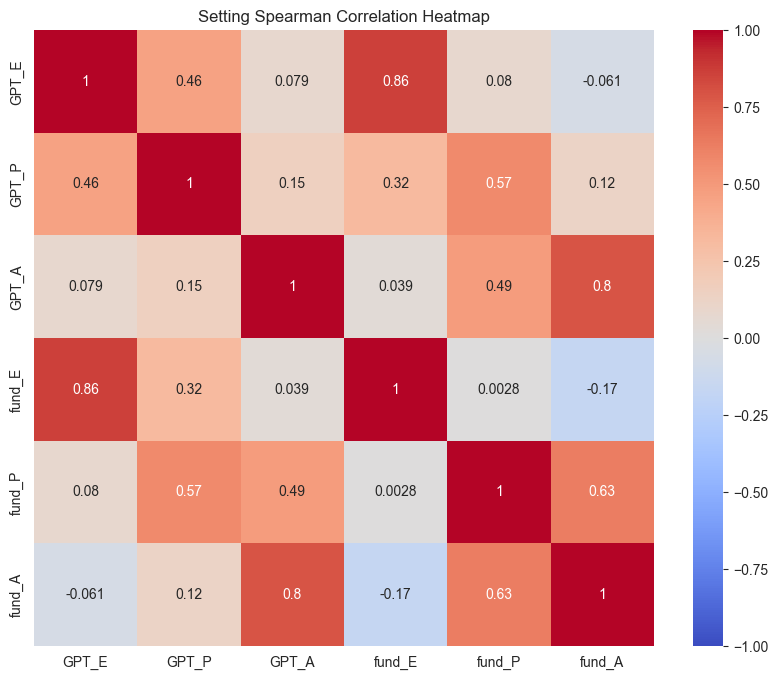

In [17]:
df_s = pd.read_csv('analysis/ori_combined_set_gpt.csv')  

concepts = df_s['Concept'].tolist()
llm_emeans = df_s['Mean_GPT_E'].tolist()
llm_pmeans = df_s['Mean_GPT_P'].tolist()
llm_ameans = df_s['Mean_GPT_A'].tolist()
gt_emeans = df_s['mean_E'].tolist() 
gt_pmeans = df_s['mean_P'].tolist()  
gt_ameans = df_s['mean_A'].tolist() 

print("============= Spearman Matrix ================")
print("Spearman correlation between GT_E and GT_E:", spear(gt_emeans, gt_emeans))
print("Spearman correlation between GT_E and GT_P:", spear(gt_emeans, gt_pmeans))
print("Spearman correlation between GT_E and GT_A:", spear(gt_emeans, gt_ameans))
print("Spearman correlation between GPT_E and GT_E:", spear(llm_emeans, gt_emeans))
print("Spearman correlation between GPT_P and GT_E:", spear(llm_pmeans, gt_emeans))
print("Spearman correlation between GPT_A and GT_E:", spear(llm_ameans, gt_emeans))
print()
print("Spearman correlation between GT_P and GT_E:", spear(gt_pmeans, gt_emeans))
print("Spearman correlation between GT_P and GT_P:", spear(gt_pmeans, gt_pmeans))
print("Spearman correlation between GT_P and GT_A:", spear(gt_pmeans, gt_ameans))
print("Spearman correlation between GPT_E and GT_P:", spear(llm_emeans, gt_pmeans))
print("Spearman correlation between GPT_P and GT_P:", spear(llm_pmeans, gt_pmeans))
print("Spearman correlation between GPT_A and GT_P:", spear(llm_ameans, gt_pmeans))
print()
print("Spearman correlation between GT_A and GT_E:", spear(gt_ameans, gt_emeans))
print("Spearman correlation between GT_A and GT_P:", spear(gt_ameans, gt_pmeans))
print("Spearman correlation between GT_A and GT_A:", spear(gt_ameans, gt_ameans))
print("Spearman correlation between GPT_E and GT_A:", spear(llm_emeans, gt_ameans))
print("Spearman correlation between GPT_P and GT_A:", spear(llm_pmeans, gt_ameans))
print("Spearman correlation between GPT_A and GT_A:", spear(llm_ameans, gt_ameans))
print()
print("Spearman correlation between GPT_E and GT_E:", spear(llm_emeans, gt_emeans))
print("Spearman correlation between GPT_E and GT_P:", spear(llm_emeans, gt_pmeans))
print("Spearman correlation between GPT_E and GT_A:", spear(llm_emeans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_E:", spear(llm_emeans, llm_emeans))
print("Spearman correlation between GPT_P and GPT_E:", spear(llm_pmeans, llm_emeans))
print("Spearman correlation between GPT_A and GPT_E:", spear(llm_ameans, llm_emeans))
print()
print("Spearman correlation between GPT_P and GT_E:", spear(llm_pmeans, gt_emeans))
print("Spearman correlation between GPT_P and GT_P:", spear(llm_pmeans, gt_pmeans))
print("Spearman correlation between GPT_P and GT_A:", spear(llm_pmeans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_P:", spear(llm_emeans, llm_pmeans))
print("Spearman correlation between GPT_P and GPT_P:", spear(llm_pmeans, llm_pmeans))
print("Spearman correlation between GPT_A and GPT_P:", spear(llm_ameans, llm_pmeans))
print()
print("Spearman correlation between GPT_A and GT_E:", spear(llm_ameans, gt_emeans))
print("Spearman correlation between GPT_A and GT_P:", spear(llm_ameans, gt_pmeans))
print("Spearman correlation between GPT_A and GT_A:", spear(llm_ameans, gt_ameans))
print("Spearman correlation between GPT_E and GPT_A:", spear(llm_emeans, llm_ameans))
print("Spearman correlation between GPT_P and GPT_A:", spear(llm_pmeans, llm_ameans))
print("Spearman correlation between GPT_A and GPT_A:", spear(llm_ameans, llm_ameans))


data = {
    'GPT_E': llm_emeans,
    'GPT_P': llm_pmeans,
    'GPT_A': llm_ameans,
    'fund_E': gt_emeans,  
    'fund_P': gt_pmeans,  
    'fund_A': gt_ameans  
}

df_corr = pd.DataFrame(data)
corr_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Setting Spearman Correlation Heatmap')
plt.show()

In [18]:
df_s['diff_E'] = df_s.apply(lambda x: abs(x['mean_E'] - x['Mean_GPT_E']), axis=1)
df_s['diff_P'] = df_s.apply(lambda x: abs(x['mean_P'] - x['Mean_GPT_P']), axis=1)
df_s['diff_A'] = df_s.apply(lambda x: abs(x['mean_A'] - x['Mean_GPT_A']), axis=1)
df_s['real_E'] = df_s.apply(lambda x: x['mean_E'] - x['Mean_GPT_E'], axis=1)
df_s['real_P'] = df_s.apply(lambda x: x['mean_P'] - x['Mean_GPT_P'], axis=1)
df_s['real_A'] = df_s.apply(lambda x: x['mean_A'] - x['Mean_GPT_A'], axis=1)

dfe = df_s.sort_values(by=['diff_E'], ascending=False).reset_index(drop=True).loc[:9]
dfp = df_s.sort_values(by=['diff_P'], ascending=False).reset_index(drop=True).loc[:9]
dfa = df_s.sort_values(by=['diff_A'], ascending=False).reset_index(drop=True).loc[:9]

print("================= Top 10 diffs ================")
print("EVALUATION")
print(dfe[['Concept', 'Mean_GPT_E', 'mean_E', 'diff_E', 'real_E']])
print("POTENCY")
print(dfp[['Concept', 'Mean_GPT_P', 'mean_P', 'diff_P', 'real_P']])
print("ACTIVITY")
print(dfa[['Concept', 'Mean_GPT_A', 'mean_A', 'diff_A', 'real_A']])

with pd.ExcelWriter('results/top_diffs_set.xlsx') as writer:
    dfe[['Concept', 'Mean_GPT_E', 'mean_E','diff_E', 'real_E']].to_excel(writer, sheet_name='EVALUATION', index=False)
    dfp[['Concept', 'Mean_GPT_P', 'mean_P','diff_P', 'real_P']].to_excel(writer, sheet_name='POTENCY', index=False)
    dfa[['Concept', 'Mean_GPT_A', 'mean_A', 'diff_A','real_A']].to_excel(writer, sheet_name='ACTIVITY', index=False)

================= Top 10 diffs ================
EVALUATION
                                             Concept  Mean_GPT_E  mean_E  \
0                               un_service_d_urgence         2.4  -1.500   
1    un_centre_d_hébergement_pour_demandeurs_d_asile         2.4  -1.229   
2                         une_librairie_pour_adultes        -1.4   1.686   
3                                  un_centre_médical         3.4   0.329   
4                              une_chaîne_de_montage        -1.6   1.329   
5                             une_banque_alimentaire         3.3   0.729   
6  une_borne_publique_de_recharge_pour_voitures_é...         2.7   0.271   
7                           un_centre_d_aide_sociale         2.2  -0.171   
8                             un_centre_de_recyclage         2.8   0.486   
9                                      une_ambulance         0.6  -1.671   

   diff_E  real_E  
0   3.900  -3.900  
1   3.629  -3.629  
2   3.086   3.086  
3   3.071  -3.071  
4   

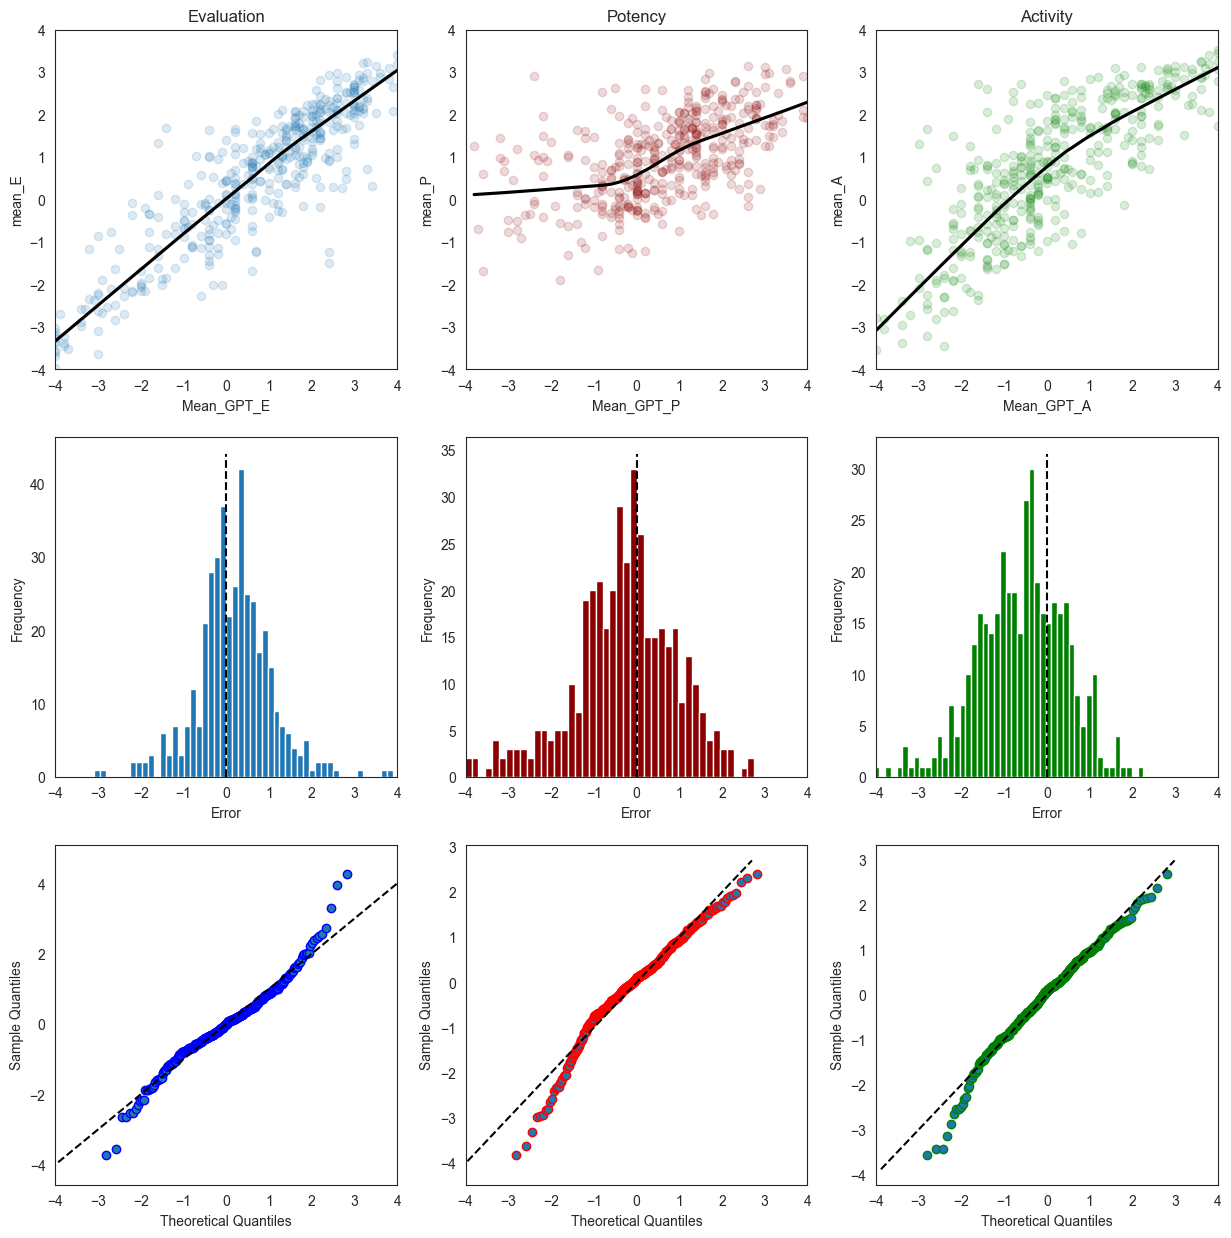

In [19]:
sb.set_style("white")

fig, axes = plt.subplots(3, 3, sharex=False, figsize=(15,15))

for i in range(3):
        axes[0][i].set_xlabel(f'Mean GPT-4 Rating')
        axes[0][i].set_ylabel(f"Mean FR Setting Dictionary Rating")
        axes[0][i].set_xlim([-4,4])
        axes[0][i].set_ylim([-4,4])

sb.regplot(data=df_s, x='Mean_GPT_E', y='mean_E', lowess=True,ax=axes[0][0],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15})
axes[0][0].set_title("Evaluation")

sb.regplot(data=df_s, x='Mean_GPT_P', y='mean_P', lowess=True,ax=axes[0][1],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15,"color":"darkred"})
axes[0][1].set_title("Potency")

sb.regplot(data=df_s,x='Mean_GPT_A', y='mean_A', lowess=True,ax=axes[0][2],
               line_kws={"color":"black"},
               scatter_kws={"alpha":0.15, "color": "green"})
axes[0][2].set_title("Activity")


axes[1][0].hist(df_s['Mean_GPT_E'] - df_s['mean_E'], bins=50)
axes[1][1].hist(df_s['Mean_GPT_P'] - df_s['mean_P'], bins=50, color="darkred")
axes[1][2].hist(df_s['Mean_GPT_A'] - df_s['mean_A'], bins=50, color="green")
for i in range(3):
        axes[1][i].set_xlabel('Error')
        axes[1][i].set_ylabel("Frequency")
        axes[1][i].set_xlim([-4,4])
        line = np.array(axes[1][i].get_ylim())
        axes[1][i].plot(np.zeros(len(line)), line, linestyle="--", color="black")


sm.qqplot(df_s['Mean_GPT_E'] - df_s['mean_E'], fit=True, ax=axes[2][0], markeredgecolor='b')
sm.qqplot(df_s['Mean_GPT_P'] - df_s['mean_P'], fit=True, ax=axes[2][1], markeredgecolor='r')
sm.qqplot(df_s['Mean_GPT_A'] - df_s['mean_A'], fit=True, ax=axes[2][2], markeredgecolor='g')

for i in range(3):
        axes[2][i].set_xlabel('Theoretical Quantiles')
        axes[2][i].set_ylabel("Sample Quantiles")
        axes[2][i].set_xlim([-4,4])
        line = np.array(axes[2][i].get_ylim())
        axes[2][i].plot(line, line, linestyle="--", color="black")


In [20]:
df1 = pd.read_csv('analysis/combined_set_gpt.csv')

df2 = pd.read_csv('fr_setting_punc.csv', header=None)

df2.columns = ['Concept', 'mean_E', 'mean_P', 'mean_A', 'sd_E', 'sd_P', 'sd_A']

df1['Concept'] = df1['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')
df2['Concept'] = df2['Concept'].str.replace(' ', '_').str.replace('-', '_').str.replace("'", '_').str.replace('^.*?_', '').str.replace('_*?$', '').str.strip('_')
df2.to_csv('analysis/df_s.csv', index=False, encoding='utf-8')
merged_df = pd.merge(df1, df2, on='Concept', how='left')

merged_df.to_csv('analysis/ori_combined_set_gpt_left.csv', index=False)